In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

### First things first
- Load the data, remove duplicated rows and rows containing only NAs

In [2]:
attacks = pd.read_csv("attacks.csv", encoding="ansi")

In [3]:
attacks_clean = attacks.copy()

attacks_clean = attacks_clean.dropna(axis="rows", how="all") # Removed all rows containing only NAs

attacks_clean = attacks_clean.loc[~attacks_clean.duplicated(), ] #Removed duplicated rows


In [4]:
attacks_clean

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6306,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6308.0,NaN,NaN
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0,NaN,NaN
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0,NaN,NaN
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
progress = pd.DataFrame(attacks.columns)
progress["progress"] = ["Waiting"] * len(attacks.columns)
progress.rename({0: "columns"}, axis = "columns", inplace=True)

progress["progress"][0:4] = "Done"
progress.loc[progress["columns"] == "Sex ", "progress"] = "Done"
progress.loc[progress["columns"] == "Type", "progress"] = "Done"
progress.loc[progress["columns"] == "Activity", "progress"] = "Done"
progress.loc[progress["columns"] == "Country", "progress"] = "Done"
progress.loc[progress["columns"] == "Fatal (Y/N)", "progress"] = "Done"
progress.loc[progress["columns"] == "Time", "progress"] = "Done"
progress.loc[progress["columns"] == "Unnamed: 22", "progress"] = "Removed"
progress.loc[progress["columns"] == "Unnamed: 23", "progress"] = "Removed"
progress.loc[progress["columns"] == "Case Number.1", "progress"] = "Removed"
progress.loc[progress["columns"] == "Case Number.2", "progress"] = "Removed"
progress.loc[progress["columns"] == "original order", "progress"] = "Done"
progress.loc[progress["columns"] == "href formula", "progress"] = "Done"
progress.loc[progress["columns"] == "href", "progress"] = "Removed"
progress.loc[progress["columns"] == "Age", "progress"] = "Done"
progress.loc[progress["columns"] == "pdf", "progress"] = "Done"
progress.loc[progress["columns"] == "Investigator or Source", "progress"] = "Done"
progress.loc[progress["columns"] == "Area", "progress"] = "Done"
progress.loc[progress["columns"] == "Location", "progress"] = "Done"
progress.loc[progress["columns"] == "Name", "progress"] = "Done"
progress.loc[progress["columns"] == "Injury", "progress"] = "Done"

progress.loc[progress["columns"] == "Species ", "progress"] = "Done"

progress

,columns,progress
0,Case Number,Done
1,Date,Done
2,Year,Done
3,Type,Done
4,Country,Done
5,Area,Done
6,Location,Done
7,Activity,Done
8,Name,Done
9,Sex,Done


In [6]:
attacks_clean.rename({"Species " : "Species"}, axis = "columns", inplace = True)
attacks_clean.rename({"Sex " : "Sex"}, axis = "columns", inplace = True)

In [7]:
attacks_clean.dtypes

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

### Dealing with columns Case Number, Case Number.1 and Case Number.2

Dropped .1 and .2 columns (they were practically the same as Case Number), removed a few rows with unusual values for Case number and almost all NAs.

In [8]:
print(f"There are {len(attacks_clean)} rows")
print(f"In column Case Number, {len(attacks_clean) - sum(attacks_clean['Case Number'].isna())} are not NA")
print(f"In column Case Number.1, {len(attacks_clean) - sum(attacks_clean['Case Number.1'].isna())} are not NA")
print(f"In column Case Number.2, {len(attacks_clean) - sum(attacks_clean['Case Number.2'].isna())} are not NA")

There are 6311 rows
In column Case Number, 6310 are not NA
In column Case Number.1, 6302 are not NA
In column Case Number.2, 6302 are not NA


In [9]:
print(f"{sum([attacks_clean['Case Number.1'][i] == attacks_clean['Case Number.2'][i] for i in range(len(attacks_clean)-1)])} records in column\
 Case Number.1 are the same in column Case Number.2")

print(f"{sum([attacks_clean['Case Number.1'][i] == attacks_clean['Case Number'][i] for i in range(len(attacks_clean)-1)])} records in column\
 Case Number.1 are the same in column Case Number")

print(f"{sum([attacks_clean['Case Number.2'][i] == attacks_clean['Case Number'][i] for i in range(len(attacks_clean)-1)])} records in column\
 Case Number.2 are the same in column Case Number")

print("\nOnly 4 records are different between Case Number and Case Number.2, and only 34 between Case Number \
and Case Number.1")

print("\nColumns Case Number.1 and Case Number.2 don't seem to have important information that isn't already in column \
Case number, except in less than 1% of the cases. I will drop both columns.")

6282 records in column Case Number.1 are the same in column Case Number.2
6278 records in column Case Number.1 are the same in column Case Number
6298 records in column Case Number.2 are the same in column Case Number

Only 4 records are different between Case Number and Case Number.2, and only 34 between Case Number and Case Number.1

Columns Case Number.1 and Case Number.2 don't seem to have important information that isn't already in column Case number, except in less than 1% of the cases. I will drop both columns.


In [10]:
[attacks_clean['Case Number'][i] for i in range(len(attacks_clean)-1)][-200:]

['1819.07.08.R',
 '1818.05.22.R',
 '1817.06.24',
 '1817.06.15',
 '1817.05.11',
 '1817.02.22',
 '1816.09.03.R',
 '1815.10.00',
 '1812.07.00',
 '1811.03.01',
 '1810.09.15',
 '1808.12.25.R',
 '1808.06.01.R',
 '1808.02.07.R',
 '1807.01.12',
 '1806.04.24',
 '1805.09.00',
 '1804.02.26.R',
 '1803.05.17',
 '1803.03.00',
 '1802.04.13.R',
 '1801.12.18.R',
 '1800.00.00',
 '1797.05.28.R',
 '1792.09.12',
 '1791.00.00',
 '1788.05.10',
 '1787.07.05',
 '1786.08.10.R',
 '1785.09.26.R',
 '1784.12.12',
 '1783.03.02',
 '1780.08.08',
 '1779.00.00',
 '1776.00.00.R',
 '1776.00.00.b',
 '1771.07.12.R',
 '1767.00.00',
 '1764.00.00',
 '1758.00.00',
 '1753.10.27.R',
 '1751.07.27',
 '1749.00.00',
 '1755.00.00',
 '1748.00.00',
 '1742.12.17',
 '1738.04.06.R',
 '1733.00.00',
 '1723.00.00',
 '1721.06.00',
 '1703.03.26',
 '1700.00.00.c',
 '1700.00.00.b',
 '1700.00.00.a',
 '1642.00.00.b',
 '1638.00.00.R',
 '1637.00.00.R',
 '1617.00.00.R',
 '1642.00.00',
 '1595.00.00',
 '1580.01.10.R',
 '1555.00.00',
 '1554.00.00',
 '154

In [11]:
attacks_clean = attacks_clean.drop(["Case Number.1", "Case Number.2"], axis = "columns")

In [12]:
#These are the 8 extra rows with values for Case Number but not for the other Case Number columns:
#0 doesn't seem like a valid case number (all others have a date format) and only other column has values.
#I will drop these rows.
print(attacks_clean.loc[attacks_clean["Case Number"]=="0", ])

     Case Number Date  Year Type Country Area Location Activity Name  Sex  \
6302           0  NaN   NaN  NaN     NaN  NaN      NaN      NaN  NaN  NaN   
6303           0  NaN   NaN  NaN     NaN  NaN      NaN      NaN  NaN  NaN   
6304           0  NaN   NaN  NaN     NaN  NaN      NaN      NaN  NaN  NaN   
6305           0  NaN   NaN  NaN     NaN  NaN      NaN      NaN  NaN  NaN   
6306           0  NaN   NaN  NaN     NaN  NaN      NaN      NaN  NaN  NaN   
6307           0  NaN   NaN  NaN     NaN  NaN      NaN      NaN  NaN  NaN   
6308           0  NaN   NaN  NaN     NaN  NaN      NaN      NaN  NaN  NaN   
6309           0  NaN   NaN  NaN     NaN  NaN      NaN      NaN  NaN  NaN   

      ... Fatal (Y/N) Time Species Investigator or Source  pdf href formula  \
6302  ...         NaN  NaN     NaN                    NaN  NaN          NaN   
6303  ...         NaN  NaN     NaN                    NaN  NaN          NaN   
6304  ...         NaN  NaN     NaN                    NaN  NaN       

In [13]:
#Drop all rows where Case number is 0
attacks_clean = attacks_clean.drop([i for i, j in enumerate(attacks_clean["Case Number"]=="0") if j], axis="rows") 


In [14]:
#There is a similar row with Case number xx and nothing else. will drop this too; it's the last row in attacks_clean
attacks_clean.loc[25722]

Case Number                xx
Date                      NaN
Year                      NaN
Type                      NaN
Country                   NaN
Area                      NaN
Location                  NaN
Activity                  NaN
Name                      NaN
Sex                       NaN
Age                       NaN
Injury                    NaN
Fatal (Y/N)               NaN
Time                      NaN
Species                   NaN
Investigator or Source    NaN
pdf                       NaN
href formula              NaN
href                      NaN
original order            NaN
Unnamed: 22               NaN
Unnamed: 23               NaN
Name: 25722, dtype: object

In [15]:
attacks_clean = attacks_clean.drop(25722, axis="rows")

### Dealing with the Date column

In [16]:
date = attacks["Date"].str.lstrip("Reported ")


In [17]:
def is_date_good(date):
    '''
    Returns true if the string is a date in the format %d-%m-%Y, else returns false.
    '''
    if len(re.findall("^[0-9]{2}-[0-9]{2}-[0-9]{4}$", date)) == 1:
        return(True)
    else:
        return(False)

In [18]:
def month_to_numbers(date):
    '''
    This function takes a string and replaces any occurrence of a month (be it a 3 letter abreviation or the full word)
    by the apropriate zero-padded two-digit number.
    '''
    months = {"January" : "01",
              "February" : "02",
              "March" : "03",
              "April" : "04",
              "May" : "05",
              "June" : "06",
              "July" : "07",
              "August" : "08",
              "September" : "09",
              "October" : "10",
              "November" : "11",
              "December" : "12",
              "Jan" : "01",
              "Feb" : "02",
              "Mar" : "03",
              "Apr" : "04",
              "Jun" : "06",
              "Jul" : "07",
              "Aug" : "08",
              "Sep" : "09",
              "Oct" : "10",
              "Nov" : "11",
              "Dec" : "12"}
    for i in months:
        if date.replace(i, months[i]) != date:
            return(date.replace(i, months[i]))    
    return(date)

In [19]:
date = date.fillna("No_date") #Replaced NAs with a string "No_date" to avoid errors caused by NAs

In [20]:
date_step_2 = [month_to_numbers(i) for i in date] #Replaced months with numbers

In [21]:
date_step_3 = [i.replace(" ", "-") for i in date_step_2] 

In [22]:
date_step_4 = [i.replace(".", "-") for i in date_step_3]

In [23]:
date_step_5 = [i.replace("--", "-") for i in date_step_3]
date_step_5 = [i.replace("--", "-") for i in date_step_5]

In [24]:
date_step_6 = ["0" + date if len(re.findall("^[0-9]{1}-[0-9]{2}-[0-9]{4}", date)) == 1 else date for date in date_step_5]
# Replaces the dates with format D-MM-YYYY with DD-MM-YYYY

In [25]:
date_step_7 = []

for i in date_step_6:
    if len(re.findall("^[0-9]{2}-[0-9]{6}$", i)) == 1:
        date_step_7.append(i[0:5]+"-"+i[5:])
    else:
        date_step_7.append(i)

# This step replaces the dates with format DD-MMYYYY with DD-MM-YYYY

In [26]:
date_step_8 = []

for i in date_step_7:
    if len(re.findall("^[0-9]{5}-[0-9]{4}$", i)) == 1:
        date_step_8.append(i[0:2]+"-"+i[3:])
    else:
        date_step_8.append(i)

#This step corrects a couple of instances where the format was DDXMM-YYYY

In [27]:
date_step_9 = []

for i in date_step_8:
    if len(re.findall(r"[0-9]{4}[^0-9]{1}[0-9]{2}[^0-9]{1}[0-9]{2}", i)) == 1:
        date_step_9.append(i[8:] + "-" + i[5:7] + "-" + i[0:4])
    else:
        date_step_9.append(i)
        
#Replaces YYYY-MM-DD with DD-MM-YYYY (sep can be any non numeric character)

In [28]:
date_step_10 = []
for i in date_step_9:
    if len(re.findall("^[0-9]{2}-[0-9]{4}", i)) == 1:
        date_step_10.append("01-"+ i)
    else:
        date_step_10.append(i)
        
#Assigns the day 01 to all dates that contain MM-YYYY. This may cause some distortions in the data, but it rescues 
#hundreds of values that would otherwise be unusable. Whether I would really apply this cleaning step in real life 
#would depend on the specific questions I needed to answer.

In [29]:
#Summary of the date transformations

print("Initially, the Date column contained only these values with the format DD-MM-YYYY:")
print(sum([len(re.findall("^[0-9]{2}-[0-9]{2}-[0-9]{4}$", i)) == 1 for i in date]))
print(" ")
print("And these with the DD-3letter month abbreviation-YYYY:")
print(sum([len(re.findall("^[0-9]{2}-[A-Z]{1}[a-z]{2}-[0-9]{4}$", i)) == 1 for i in date]))
print(" ")
print("After cleaning, the Date column has these usable dates in the format DD-MM-YYYY:")
print(sum([len(re.findall("^[0-9]{2}-[0-9]{2}-[0-9]{4}$", i)) == 1 for i in date_step_10]))
print(" ")
print(f"Recovered in total {5700-5313-2} values that would otherwise not have been usable.")



Initially, the Date column contained only these values with the format DD-MM-YYYY:
2
 
And these with the DD-3letter month abbreviation-YYYY:
5313
 
After cleaning, the Date column has these usable dates in the format DD-MM-YYYY:
5700
 
Recovered in total 385 values that would otherwise not have been usable.


In [30]:
attacks_clean["Date"] = pd.to_datetime(pd.Series([i if is_date_good(i) else pd.NA for i in date_step_10]))
#Replaces the Date column in the dataset with the cleaned up dates. Where the dates didn't follow the format
#DD-MM-YYYY even after all the cleaning, assigned NA. Most of those had only year information. Again, whether I would 
#proceed like this in real life would depend on what I wanted to do with the data. If year information would be enough,
#then I would try to not kick out the values that have only that information.

### Dealing with the Type column

In [31]:
attacks_clean.loc[attacks_clean["Type"]=="Boat", "Type"] = "Boating"
attacks_clean.loc[attacks_clean["Type"]=="Boatomg", "Type"] = "Boating"
attacks_clean["Type"].value_counts()

Unprovoked      4595
Provoked         574
Invalid          547
Boating          341
Sea Disaster     239
Questionable       2
Name: Type, dtype: int64

### Dealing with the Country column

In [32]:
attacks_clean["Country"] = attacks_clean["Country"].str.title()

###  Dealing with the Area column

In [33]:
# This one also
attacks_clean["Area"].head(50)

0                California
1                   Georgia
2                    Hawaii
3           New South Wales
4                    Colima
5           New South Wales
6                Pernambuco
7                   Florida
8                   Florida
9                   Florida
10               Queensland
11           South Carolina
12           South Carolina
13                 Cornwall
14        Westerm Australia
15    Eastern Cape Province
16          New South Wales
17                  Hua Hin
18             Cocos Island
19        Western Australia
20          New South Wales
21        Western Australia
22        Western Australia
23        Alifu Alifu Atoll
24    Western Cape Province
25                   Hawaii
26                  Hua Hin
27               Pernambuco
28        Western Australia
29        Western Australia
30           New Providence
31                  Alagoas
32                      NaN
33                      NaN
34    Eastern Cape Province
35                  

### Dealing with the Location column

In [34]:
# This one also; I'll just str.strip it to remove leading and trailing whitespace
attacks_clean["Location"] = attacks_clean["Location"].str.strip()
attacks_clean["Location"].head(50)

0                           Oceanside, San Diego County
1                        St. Simon Island, Glynn County
2                                          Habush, Oahu
3                                    Arrawarra Headland
4                                              La Ticla
5                                    Flat Rock, Ballina
6                                 Piedade Beach, Recife
7     Lighhouse Point Park, Ponce Inlet, Volusia County
8                          Cocoa Beach, Brevard  County
9                         Daytona Beach, Volusia County
10                                      Cairns Aquarium
11                    Isle of Palms,  Charleston County
12                  Hilton Head Island, Beaufort County
13                                       Off Land's End
14                                           Dugong Bay
15                            Nahoon Beach, East London
16                               Sharpes Beach, Ballina
17                                        Sai No

### Dealing with the Name column

In [35]:
attacks_clean["Name"] = attacks_clean["Name"].str.strip()

In [36]:
attacks_clean["Name"].head(50)

0               Julie Wolfe
1            Adyson McNeely
2               John Denges
3                      male
4             Gustavo Ramos
5                   Chris …
6     Jose Ernesto da Silva
7                      male
8                 Cody High
9                      male
10                     male
11             Trey de Boer
12              Jei Turrell
13             Max Berryman
14          Melisa Brunning
15                     male
16                     male
17                   female
18                     male
19              Adam Murray
20              Matthew Lee
21                Rob Bruce
22             Nathan Burch
23            Ahmed Rasheed
24                     male
25         Dylan McWilliams
26         Werner Danielsen
27            Pablo de Melo
28           Jason Longrass
29     Alejandro Travaglini
30              Bruce Rowan
31               Josias Paz
32                      NaN
33          Shane McConnell
34             Ross Spowart
35                  

In [37]:
# If the only information in the Name column is "male" or "female" and the corresponding entry in the Sex column is NA,
# I will fill the Sex column with the right value ("M" or "F") and replace the Name with NA
# If there is already a value in the Sex column, I will replace "male" or "female" in the Name column with NA.

genders = {"male" : "M",
          "female" : "F"}

for i in attacks_clean.index:
    try:
        if attacks_clean.loc[i, "Name"].lower() in ["male", "female"]:
            if pd.isna(attacks_clean.loc[i, "Sex"]):
                attacks_clean.loc[i, "Sex"] = genders[attacks_clean.loc[i, "Name"].lower()]
                attacks_clean.loc[i, "Name"] = pd.NA
            else:
                attacks_clean.loc[i, "Name"] = pd.NA
    except:
        next

In [38]:
# This is still a mess, but it's not something that I can easily clean

attacks_clean["Name"].tail(50)

6252                                                 <NA>
6253                                            an Indian
6254                                           Sandrillio
6255                                                 <NA>
6256                                         Dusty Rhodes
6257                                                 <NA>
6258                                 Gilbertese fisherman
6259                                                   C.
6260                                        American male
6261                                             Mortakee
6262                                     an old fisherman
6263                                    a local dignitary
6264                                     I.A.S. C. driver
6265                                                 <NA>
6266                                        a pearl diver
6267                                  a fisherman / diver
6268                                        a pearl diver
6269    8 US a

### Dealing with the Sex column

In [39]:
sex_step_1 = attacks_clean["Sex"].replace("M ", "M")

sex_step_2 = pd.Series([pd.NA if i not in ("F", "M") else i for i in sex_step_1])

attacks_clean["Sex"] = sex_step_2

#Replaced anything that wasn't M or F with NA

### Dealing with the Age column

In [40]:
def validate_age(age):
    try:
        if (len(re.findall("^[0-9]{1,2}$", age.strip()))) == 1:
            return(True)
        else:
            return(False)
    except:
        return(False)


In [41]:
bad_ages = attacks_clean.loc[[not validate_age(i) for i in attacks_clean["Age"]], "Age"]
len(bad_ages)

2933

In [42]:
sum(bad_ages.isna())

2831

In [43]:
#There's nothing to be done with these values. I'll turn them all into NA
[i for i in bad_ages if pd.notna(i)]

['40s',
 '20s',
 'Teen',
 '40s',
 '60s',
 'Teen',
 '18 months',
 '40s',
 '20s',
 '30s',
 '50s',
 'Teen',
 'teen',
 'teen',
 'teen',
 '28 & 26',
 '30s',
 '20s',
 'Teen',
 'teen',
 '18 or 20',
 'Teen',
 '12 or 13',
 '30s',
 '20s',
 '46 & 34',
 '28, 23 & 30',
 'teen',
 '30s',
 'Teens',
 '30s',
 'Teen',
 '36 & 26',
 '8 or 10',
 '\xa0 ',
 ' ',
 '30 or 36',
 '6½',
 '21 & ?',
 '33 or 37',
 'mid-30s',
 '23 & 20',
 '7      &    31',
 '20?',
 "60's",
 '32 & 30',
 '30s',
 '30s',
 '16 to 18',
 'Elderly',
 '20s',
 'mid-20s',
 'Ca. 33',
 '20s',
 ' ',
 '21 or 26',
 '20s',
 '>50',
 '18 to 22',
 'adult',
 '9 & 12',
 '? & 19',
 '9 months',
 'Teen',
 '25 to 35',
 '23 & 26',
 '(adult)',
 '33 & 37',
 '25 or 28',
 '37, 67, 35, 27,  ? & 27',
 '21, 34,24 & 35',
 '30 & 32',
 '50 & 30',
 '17 & 35',
 'X',
 '"middle-age"',
 '13 or 18',
 '34 & 19',
 '33 & 26',
 '2 to 3 months',
 'MAKE LINE GREEN',
 '"young"',
 '7 or 8',
 '17 & 16',
 '8 or 10',
 'F',
 'Both 11',
 '9 or 10',
 'young',
 '36 & 23',
 'Teen',
 '50s',
 '

In [44]:
attacks_clean["Age"] = [i if validate_age(i) else pd.NA for i in attacks_clean["Age"]]

### Dealing with the Injury column

In [45]:
# This is a messy column, but there's not a lot I can do about it.
# Better to just leave it as it is. I'll just str.strip it just in case.

attacks_clean["Injury"] = attacks_clean["Injury"].str.strip()
attacks_clean["Injury"].tail(50)

6252                                                FATAL
6253                                   FATAL, leg severed
6254                 FATAL, hip bitten  PROVOKED INCIDENT
6255                                      Buttocks bitten
6256                                            No injury
6257                                             Survived
6258                                                FATAL
6259    FATAL, shark leapt into raft and bit the man w...
6260                                       Buttock bitten
6261                                          Head bitten
6262                      FATAL, foot lacerated & crushed
6263    FATAL, femoral artery severed, died 12 days later
6264    FATAL, fell into water when shark seized his r...
6265        FATAL, left leg bitten with severe blood loss
6266                                FATAL, died of sepsis
6267                                      Buttocks bitten
6268                 Foot lacerated, surgically amputated
6269          

### Dealing with the Fatal (Y/N) column

In [46]:
attacks_clean["Fatal (Y/N)"] = attacks_clean["Fatal (Y/N)"].str.upper().str.strip()

attacks_clean.loc[~attacks_clean["Fatal (Y/N)"].isin(["N", "Y"]), "Fatal (Y/N)"] = pd.NA

print("Went from this:")
print(attacks["Fatal (Y/N)"].value_counts(), "\n")
print("To this:")
print(attacks_clean["Fatal (Y/N)"].value_counts())

Went from this:
N          4293
Y          1388
UNKNOWN      71
 N            7
2017          1
y             1
M             1
N             1
Name: Fatal (Y/N), dtype: int64 

To this:
N    4301
Y    1389
Name: Fatal (Y/N), dtype: int64


### Dealing with the Time column

In [47]:
attacks["Time"].head(20)

0              18h00
1      14h00  -15h00
2              07h45
3                NaN
4                NaN
5                NaN
6     Late afternoon
7                NaN
8              17h00
9              14h00
10           Morning
11               NaN
12             15h00
13             08h15
14               NaN
15             11h00
16             10h30
17               NaN
18             10h40
19             16h50
Name: Time, dtype: object

In [48]:
time_step_1 = [re.findall(r"[0-2][0-9]h[0-6][0-9]", i) if not pd.isna(i) else "Not available" for i in attacks_clean["Time"]]

In [49]:
time_step_2 = [i[0] if len(i) != 0 and type(i)==list else i for i in time_step_1]

In [50]:
time_no_nas = attacks_clean.loc[~attacks_clean["Time"].isna(), "Time"]
 
print(f"There are in total {len(time_no_nas)} non-NA values in the column Time")
print(f"Out of these, {sum([len(i)==1 for i in time_step_1])} follow the hh:mm format")
print(f"Another {sum(time_no_nas[time_no_nas.str.isalpha()].value_counts())} values contain only letters (no numbers or \
special characters)")

There are in total 2948 non-NA values in the column Time
Out of these, 2335 follow the hh:mm format
Another 451 values contain only letters (no numbers or special characters)


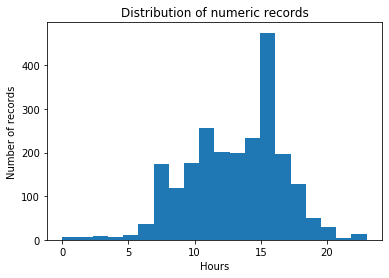

In [51]:
#Distribution of records that follow the hh-mm format

fig, ax = plt.subplots()

ax.hist(pd.Series([int(i[0][0:2]) for i in time_step_1 if len(i)==1]), bins=20);
ax.set_xlabel("Hours")
ax.set_ylabel("Number of records")
ax.set_title("Distribution of numeric records")

plt.show();

In [52]:
#These are the counts for values that contain only letters:

(time_no_nas[time_no_nas.str.isalpha()]
            .str.lower()
            .value_counts())

afternoon    187
morning      121
night         63
evening       34
dusk          16
midday        10
sunset         4
midnight       4
am             2
dawn           2
dark           2
x              1
daytime        1
lunchtime      1
daybreak       1
nightfall      1
noon           1
Name: Time, dtype: int64

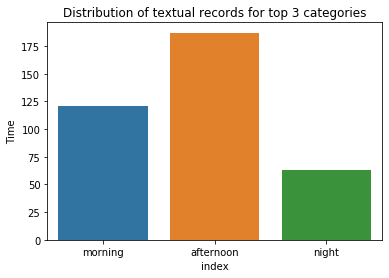

In [53]:
#Distribution of records with textual entries for Time column (top 3 categories, comprising 371/451 = 82% of the textual
#entries)

ax = sns.barplot("index", 
            "Time", 
            data = time_no_nas[time_no_nas.str.isalpha()]
            .str.lower()
            .value_counts()
            .head(3)
            .reset_index(), order=["morning", "afternoon", "night"]);
ax.set_title("Distribution of textual records for top 3 categories");

Ignoring the textual entries could skew the results of any analysis based on the Time column, because the distribution of this subset of the data is a bit different than the subset of data that follows the hh-mm format (there seem to be comparatively more records at night in the barplot than in the histogram above). For example, if we want to ask how the shark attacks are distributed across the day, we would underestimate the number of attacks that occur at night. 

However, the textual data is much less precise than the numeric data, so depending on what the question is, it might not make sense to use it at all. 

Deciding what to do with this is a difficult choice, because it would depend heavily on what we want to do with the data. For the sake of simplicity, I will remove the textual data and replace it with NA.

In [54]:
time_step_3 = ["Not available" if type(i) == list else i for i in time_step_2]
time_step_4 = [pd.NA if i == "Not available" else i for i in time_step_3]

attacks_clean["Time"] = time_step_4

### Dealing with the Species column

This is a VERY messy column. My strategy was this:
- Find the most common species
- Find the entries containing each those species (unless they also contained some words associated with uncertainty
- Anything that was left was lumped together into an "Undentidified, unclear or other" category

This left me with around 60% of all valid values in informative categories, and the other 40% in the "Undentidified, unclear or other" category, which is not informative. Because of this, I will not drop the original species column, but rather add a new, cleaner one. This way, if the user is interested in a specific record that is "Undentidified, unclear or other", they can always try to find additional information in the original, messy column. 

In [55]:
(3354 - 1296)/3354

0.6135957066189625

In [56]:
attacks_clean["Species"] = attacks_clean["Species"].str.strip().str.capitalize()

attacks_clean["Species"].value_counts().head(50)


White shark                                           165
Shark involvement prior to death was not confirmed    105
Invalid                                               102
Shark involvement not confirmed                        89
Tiger shark                                            74
Shark involvement prior to death unconfirmed           68
Bull shark                                             55
6' shark                                               40
4' shark                                               40
Questionable incident                                  38
1.8 m [6'] shark                                       37
Questionable                                           34
1.5 m [5'] shark                                       32
1.2 m [4'] shark                                       27
3' shark                                               26
5' shark                                               26
2 m shark                                              25
4' to 5' shark

In [57]:
species_step_1 = attacks_clean["Species"].copy()

In [58]:
for i in species_step_1.index:
    if species_step_1[i] in ["Shark involvement prior to death unconfirmed", "Shark involvement prior to death was not confirmed"]:
        species_step_1[i] = "Shark involvement prior to death not confirmed"
    if species_step_1[i] == "Questionable":
        species_step_1[i] = "Questionable incident"
species_step_1.value_counts().head(50)

Shark involvement prior to death not confirmed    186
White shark                                       165
Invalid                                           102
Shark involvement not confirmed                    89
Tiger shark                                        74
Questionable incident                              72
Bull shark                                         55
6' shark                                           40
4' shark                                           40
1.8 m [6'] shark                                   37
1.5 m [5'] shark                                   32
1.2 m [4'] shark                                   27
5' shark                                           26
3' shark                                           26
2 m shark                                          25
4' to 5' shark                                     24
Wobbegong shark                                    22
3 m [10'] shark                                    22
No shark involvement        

In [59]:
species_step_2 = species_step_1.copy()

possible_terms = ["possibl", "thought", "?", "filmed by", "said to", "remains recovered", "believed", "allegedly"]
no_shark_terms = ["no shark involvement"]
or_terms = [" or ", "(or"]

species_step_2 = species_step_2.str.replace("7-gill", "sevengill").str.capitalize()
species_step_2 = species_step_2.str.replace("smoothhound", "smooth hound").str.capitalize()

species_names = (["white", "tiger", "bull", "blacktip", "mako", "wobbegong", "blue", "raggedtooth", "nurse", 
                  "whaler", "zambesi", "hammerhead", "lemon", "basking", "reef", "spinner", "sand", "whitetip",
                 "angel", "galapagos", "sevengill", "dog", "porbeagle", "smooth hound", "silky", 
                  "port jackson", "goblin", "spotted cat"])

for entry in species_step_2.index:
    for species in species_names:
        try:
            if species in species_step_1[entry].lower():
                if any([term in species_step_1[entry].lower() for term in or_terms]):
                    species_step_2[entry] = species_step_2[entry]
                elif any([term in species_step_1[entry].lower() for term in possible_terms]):
                    species_step_2[entry] = ("Unidentified, unclear or other")
                else:
                    species_step_2[entry] = f"{species.capitalize()} shark"
        except:
            next
            

In [60]:
species_step_3 = species_step_2.copy()

for i in species_step_2.index:
    try:
        if ((len(re.findall(r"\d{1,2} {0,1}[m'k\"s]", species_step_2[i]))>0 
            or "small" in species_step_2[i].lower()
            or "large" in species_step_2[i].lower())
            and not any([species_name in species_step_2[i] for species_name in species_names])):
            species_step_3[i] = "Unidentified, unclear or other"
            
    except:
        next

In [61]:
species_step_3 = species_step_3.str.replace(r"^Unidentified$", "Unidentified, unclear or other")
species_step_3 = species_step_3.str.replace(r"^Unidentified species$", "Unidentified, unclear or other")
for i in species_step_3.index:
    if pd.notna(species_step_3[i]):
        if species_step_3[i] == "" or species_step_3[i] == "Invalid":
            species_step_3[i] = pd.NA

In [62]:
print(f"There are {sum(species_step_3.notna())} valid values in the species column (out of {len(attacks_clean)} total rows).")
print(f"The fist 35 categories cover {sum(species_step_3.value_counts().head(35))} records")
print("Everything else will be lumped together as Unidentified, unclear or other.")

There are 3354 valid values in the species column (out of 6302 total rows).
The fist 35 categories cover 3177 records
Everything else will be lumped together as Unidentified, unclear or other.


In [63]:
species_top_35 = species_step_3.value_counts().head(35)
species_top_35

Unidentified, unclear or other                    1119
White shark                                        596
Tiger shark                                        232
Shark involvement prior to death not confirmed     186
Bull shark                                         154
Nurse shark                                         89
Shark involvement not confirmed                     89
Questionable incident                               72
Whaler shark                                        66
Reef shark                                          58
Mako shark                                          50
Blacktip shark                                      50
Blue shark                                          49
Wobbegong shark                                     46
Raggedtooth shark                                   43
Sand shark                                          40
Hammerhead shark                                    40
Lemon shark                                         31
Whitetip s

In [64]:
species_step_4 = species_step_3.copy()

for i in species_step_4.index:
    try:
        if species_step_4[i] not in species_top_35 and pd.notna(species_step_4[i]):
            species_step_4[i] = "Unidentified, unclear or other"
    except:
        next

species_step_4.value_counts()

Unidentified, unclear or other                    1296
White shark                                        596
Tiger shark                                        232
Shark involvement prior to death not confirmed     186
Bull shark                                         154
Nurse shark                                         89
Shark involvement not confirmed                     89
Questionable incident                               72
Whaler shark                                        66
Reef shark                                          58
Mako shark                                          50
Blacktip shark                                      50
Blue shark                                          49
Wobbegong shark                                     46
Raggedtooth shark                                   43
Hammerhead shark                                    40
Sand shark                                          40
Lemon shark                                         31
Whitetip s

In [65]:
attacks_clean = attacks_clean.assign(Species_Categories = species_step_4)

### Dealing with the Investigator or Source column

In [66]:
#This column seems ok-ish
attacks_clean["Investigator or Source"].head(50) 

0                                      R. Collier, GSAF
1                        K.McMurray, TrackingSharks.com
2                        K.McMurray, TrackingSharks.com
3                                        B. Myatt, GSAF
4                                             A .Kipper
5                             Daily Telegraph, 6/4/2018
6                        Diario de Pernambuco, 6/4/2018
7                       K. McMurray, TrackingSharks.com
8                        K.McMurray, TrackingSharks.com
9                      K. McMurray, Tracking Sharks.com
10                               ABC.net.au ,05/24/2018
11                                    C. Creswell, GSAF
12    C. Creswell, GSAF & K. McMurray TrackingSharks...
13                      K. McMurray, TrackingSharks.com
14                                 Perth Now, 6/30/2018
15                    B.Jacob, Dispatch Live, 5/12/2018
16                                       B. Myatt, GSAF
17                      K. McMurray, TrackingSha

### Dealing with the pdf column

In [67]:
sum([len(re.findall(r"\.pdf$", i))==1 for i in attacks_clean["pdf"].str.strip()])

6273

In [68]:
def validate_pdf(pdf):
    try:
        return(len(re.findall(r"\.pdf$", pdf))==1)
    except:
        return(pdf)

In [69]:
bad_pdfs = attacks_clean.loc[[not validate_pdf(i) for i in attacks_clean["pdf"].str.strip()], "pdf"]

In [70]:
def correct_pdf(pdf):
    pdf_mistakes = {".pff" : ".pdf",
                    "-pdf" : ".pdf",
                    ". pdf" : ".pdf",
                    ".pf" : ".pdf",
                    ", pdf" : ".pdf",
                    ". Pdf" : ".pdf"}

    try:
        endswith = []
        ending = ""
        for i in pdf_mistakes:
            endswith.append(pdf.endswith(i))
            if pdf.endswith(i):
                ending = i
        if any(endswith):    
            return(pdf.strip(ending) + pdf_mistakes[ending])
        else:
            return(pdf + ".pdf")
    except:
        return(url)

#The function works; the pdfs where the problem was the ending are fixed; still plenty of bad ones, though
[correct_pdf(i) for i in bad_pdfs] 


['2018.04.14-Rowan.pdf',
 '2017.02.24-Mandurah.pdf',
 '2016.05.02-NZ.pdf',
 '2015.10.17.b.-Hawaii.pdf',
 '2015.08.19-Szsarmack.pdf',
 '2015.06.30.b-Steve.pdf',
 '2015.06.13-Specker.pdf',
 '2014.10.17-Olsson.pdf',
 '2014.08.09.R-Hindley.pdf',
 '2014.05.14-McLeo.pdf',
 '.2014.04.12.R-inflatable.pdf',
 '2014.03.18.c-Borgna.pdf',
 '2014.02.17.R-OneDLL.pdf',
 "2014.01.26-O'Connor.pdf",
 '2014.01.25-Grant.pdf',
 '2013.07.29.a-Gatewood.pdf',
 '12.26.pdf',
 '2008.07.26.a-Maui.pdf',
 '1989.00.00.b-Halstead.pdf',
 '1983.06.00-Starling.pdf',
 '1962.08.30.b.pdf',
 '1957.00.00.i-baby.pdf',
 '1942.07.06-Bardolini.pdf',
 '1905.07.00.pdf',
 '1899.09.11.R-Guyot.pdf',
 '1888.10.23.R-Croatia.pdf',
 '1867.01.26.R-Queenscliff.pdf',
 '1788.05.10-Sydney.pdf',
 '1638.00.00.R-Herbert.pdf']

In [71]:
pdfs_step_1 = []

for pdf in attacks_clean["pdf"]:
    try:
        if validate_pdf(pdf):
            pdfs_step_1.append(pdf)
        else:
            pdfs_step_1.append(correct_pdf(pdf))
    except:
        print("oops")

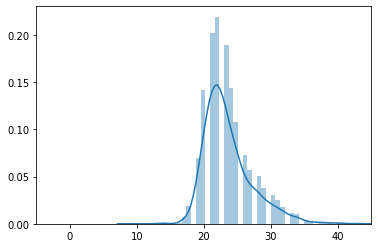

In [72]:
ax = sns.distplot([len(i) for i in pdfs_step_1])
ax.set_xlim((-5,45))
plt.show()

In [73]:
# I am going to impose a cutoff for pdfs shorts than 17 characters, as none of those are proper pdf names (except for 
# most of those starting with ND). 17 or longer, there start to be many apparently valid ones, so I'll leave those alone

[i for i in pdfs_step_1 if len(i)<17 and not i.startswith("ND")]


['2017.07.31.pdf',
 '12.26.pdf',
 '1962.08.30.b.pdf',
 '1914.07.15.R.pdf',
 '1914.07.07.pdf',
 '1905.07.00.pdf',
 '500AD-Mexico.pdf',
 '77AD-Pliny.pdf',
 '725BC-vase.pdf']

In [74]:
pdfs_step_2 = [i if len(i)>17 or i.startswith("ND") else pd.NA for i in pdfs_step_1]

In [75]:
pdfs_with_wrong_start = attacks_clean.loc[([not attacks_clean["pdf"][i].startswith(attacks_clean["Case Number"][i])
                                            if pd.notna(attacks_clean["pdf"][i]) 
                                            and pd.notna(attacks_clean["Case Number"][i]) 
                                            else False 
                                            for i in range(len(attacks_clean))]), 
                                          ["Case Number", "pdf"]]

In [76]:
for i in pdfs_with_wrong_start.index:
    print(pdfs_with_wrong_start["Case Number"][i], pdfs_with_wrong_start["pdf"][i])
    
# Ok I thought this would be something fixable, but that doesn't seem to be the case for most of the pdfs where 
# the beginning doesn't exactly match their case number. Most of them start with different case numbers, but how 
# can I know which one is correct, the one in the case number column or the one on the pdf? I can't. 
# So, it will stay like this. It's not like this dataset could ever be really fixed anyway. What it needs is an 
# exorcism, because it is the work of the Devil. I HATE THIS DATASET. Andy, Tessa and Emily, WHY WOULD YOU EVER DO THIS
# TO ANYONE??? IT IS SO MEAN *starts crying*

2017.10.31.R 2017.10.21.R-Tolley.pdf
2017.09.06.R 2017.09.06-Bartholomew.pdf
2017.08.29 2017.08.27-Brundler.pdf
2017.04.26 2017.05.26-Cavelli.pdf
2017.04.06 2017.04.07-Stephens.pdf
2016.12.11.b 2015.12.11.b-Takapoto.pdf
2016.09.15 2016.09.16-BellsBeach.pdf
2016.08.04 2016.06.04-Tyler.pdf
2016.03.28.a 2013.03.28.a-Smyth.pdf
2016.02.10 2016.02.11-NettleyBay.pdf
2015.12.23 2015.11.07-Underwood.pdf
2015.10.28.a 2015.10.28-Senensi.pdf
2015.07-10 2015.07.10-Miskin.pdf
2015.01.30 2015.01.20-Carter.pdf
2014.10.30 2014.10.29-Hunt.pdf
2014.09.13.R 2014.09.12.R-Moorea.pdf
2014.08.12 2014.08.15-Hayes.pdf
2014.08.06 2014.08.14-Harris.pdf
2014.08.02 2014.08.08-CocoaBeach.pdf
2014.06.27.R 2014.06.27-Mooney.pdf
2014.05.04 2015.05.04-CowShark.pdf
2014.04.12.R .2014.04.12.R-inflatable
2013.10.05 2013.10.06-Scrivner.pdf
2013.09.01.c 2013.09.01-KeyWestAquarium.pdf
2013.08.25.b 2013.08.25-OttoLee.pdf
2013.08.08.R 2013.08.08-Tyler.pdf
2013.07.17.R 2013.07.17-StAugustine.pdf
2013.05.23.b 2013.05.25.b-daSilva

In [77]:
attacks_clean["pdf"] = pdfs_step_2

At this point I wanted to make a sanity check and see if I still had many rows with mostly NAs.
The maximum amount of NAs per row is 10 (=50% of all columns), so it's not so high that it justifies kicking out rows for it.

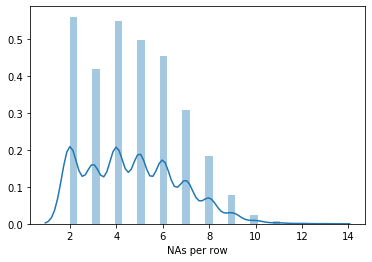

In [78]:
ax = sns.distplot([sum(attacks_clean.loc[i].isna()) for i in attacks_clean.index])
ax.set_xlabel("NAs per row")
plt.show()

In [79]:
max([sum(attacks_clean.loc[i].isna()) for i in attacks_clean.index])

13

### Dealing with the href and href formula columns

In [80]:
attacks_clean.loc[[len(re.findall(r"^http://", i))!=1 for i in attacks_clean["href"]], ]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Time,Species,Investigator or Source,pdf,href formula,href,original order,Unnamed: 22,Unnamed: 23,Species_Categories
587,2014.01.04,2014-04-01,2014.0,Sea Disaster,Japan,Okinawa Prefecture,Off Miyako Island,Sea disaster,Rianto,M,...,<NA>,NaN,"Focus Taiwan, 1/7/2014",2014.01.04-Rianto.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,pdf_directory2014.01.04-Riano.pdf,5716.0,NaN,NaN,NaN
6216,ND.0100,NaT,0.0,Unprovoked,Bahamas,Andros Islands,Great Guana Cay,Spearfishing,C.D. Dollar,M,...,<NA>,1.8 m [6'] shark,"R.D. Weeks, GSAF",ND-0100-CDDollar.pdf,Q93http://sharkattackfile.net/spreadsheets/pdf...,Q93http://sharkattackfile.net/spreadsheets/pdf...,87.0,NaN,NaN,"Unidentified, unclear or other"


In [81]:
attacks_clean.loc[588, "href"]

'http://sharkattackfile.net/spreadsheets/pdf_directory/http://sharkattackfile.net/spreadsheets/pdf_directory/2014.00.00.b-OceanicWhitetip.pdf'

In [82]:
href_diffs = attacks_clean.loc[[attacks_clean["href formula"][i] != attacks_clean["href"][i] for i in range(len(attacks_clean))], ["href formula", "href"]]
href_diffs = href_diffs.reset_index()
for i in range(len(href_diffs["href"])):
    print(href_diffs["href"][i])
    print(href_diffs["href formula"][i])
    print("______________________")

http://sharkattackfile.net/spreadsheets/pdf_directory/http://sharkattackfile.net/spreadsheets/pdf_directory/2018.01.13-Stewart.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/2018.01.13-Stewart.pdf
______________________
http://sharkattackfile.net/spreadsheets/pdf_directory/http://sharkattackfile.net/spreadsheets/pdf_directory/2017.08.27-Brundler.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/2017.08.27-Brundler.pdf
______________________
http://sharkattackfile.net/spreadsheets/pdf_directory/http://sharkattackfile.net/spreadsheets/pdf_directory/2017.06.05-FrenchPolynesia.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/2017.06.05-FrenchPolynesia.pdf
______________________
http://sharkattackfile.net/spreadsheets/pdf_directory/http://sharkattackfile.net/spreadsheets/pdf_directory/2017.06.11-Goff.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/2017.06.11-Goff.pdf
______________________
http://sharkattackfile.net/spreadsheets/pdf_directory/http://sha

Upon inspection, we can see that for the cases where href formula and href differ, href formula formula has the correct (or closer to correct) URL with no duplicated portions and with the right Case Number as part of the URL. I will therefore drop the href column.

In [83]:
attacks_clean = attacks_clean.drop("href", axis="columns")

In [84]:
def validate_url(url):
    '''
    This function checks if a string contains a URL starting with "http://sharkattackfile.net/spreadsheets/pdf_directory/"
    and ending with ".pdf". It also checks if the first part of the url is repeated or is not at the beginning of the 
    string. If it fulfills the first condition but not the second, returns True.
    '''
    try:
        if len(re.findall(r"(http://sharkattackfile.net/spreadsheets/pdf_directory/.*?\.pdf)", url)) == 1:
            if len(re.findall(r" (?!^)(http://sharkattackfile.net/spreadsheets/pdf_directory/.*?\.pdf)", url)) == 0:
                return(True)
        else:
            return(False)
    except TypeError:
        return(False)
    

In [85]:
bad_urls = [j for j in attacks_clean.loc[[not validate_url(i) for i in attacks_clean["href formula"]], "href formula"]]

In [86]:
bad_urls

['http://sharkattackfile.net/spreadsheets/pdf_directory/2018.04.14-Rowan.pff',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2017.02.24-Mandurah',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2016.05.02-NZ-pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2015.10.17.b.-Hawaii. pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2015.08.19-Szsarmack',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2015.06.30.b-Steve.pf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2015.06.13-Specker',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2014.10.17-Olsson, pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2014.08.09.R-Hindley, pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2014.05.14-McLeod, pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/.2014.04.12.R-inflatable',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2014.03.18.c-Borgna',
 'http://sharkattackfile.net/spreadsheet

I used the validate_url function to isolate those entries with some obvious problems. For most of those, the problem is at the end of the url. The following function will be used to correct some of those issues.

In [87]:
def correct_url(url):
    '''
    This function takes a string containing a url with a wrong ending and tries to correct it.
    If the url starts with "http://sharkattackfile.net/spreadsheets/pdf_directory/" and ends with one of 6 possible wrong 
    spellings of .pdf, it replaces the wrong ending with .pdf.
    If the url starts with "http://sharkattackfile.net/spreadsheets/pdf_directory/" but doesn't end with one of those 6
    possible endings, it simply appends .pdf to the url.
    If this is successful, the function returns the corrected url.
    If not (because the argument was not a string, or was not a url with the correct start) it returns the argument 
    passed, unchanged.
    '''
    pdf_mistakes = {".pff" : ".pdf",
                    "-pdf" : ".pdf",
                    ". pdf" : ".pdf",
                    ".pf" : ".pdf",
                    ", pdf" : ".pdf",
                    ". Pdf" : ".pdf"}
    try:
        if len(re.findall(r"(http://sharkattackfile.net/spreadsheets/pdf_directory/.*?)", url)) == 1:
            if len(re.findall(r"http://sharkattackfile.net/spreadsheets/pdf_directory/.*[\.\-,]", url)) == 1:
                try:
                    endswith = []
                    ending = ""
                    for i in pdf_mistakes:
                        endswith.append(url.endswith(i))
                        if url.endswith(i):
                            ending = i
                    if any(endswith):    
                        return(url.strip(ending) + pdf_mistakes[ending])
                    else:
                        return(url + ".pdf")
                except:
                    return(url)
            else:
                return(url)
        else:
            return(url)
    except:
        return(url)


In [88]:
[print(correct_url(i)) for i in bad_urls]

http://sharkattackfile.net/spreadsheets/pdf_directory/2018.04.14-Rowan.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/2017.02.24-Mandurah.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/2016.05.02-NZ.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/2015.10.17.b.-Hawaii.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/2015.08.19-Szsarmack.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/2015.06.30.b-Steve.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/2015.06.13-Specker.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/2014.10.17-Olsson.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/2014.08.09.R-Hindley.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/2014.05.14-McLeo.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/.2014.04.12.R-inflatable.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/2014.03.18.c-Borgna.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/2014.02.17.R-OneDL

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Most of the problems were solved. Therefore, I checked every entry in href formula with the validate_url function to see if seem like valid URLs, and corrected the ones that weren't with the correct_url function.

In [89]:
url_list = []

for i in attacks_clean["href formula"]:
    if validate_url(i):
        url_list.append(i.replace(" ", ""))
    else:
        url_list.append(correct_url(i))


attacks_clean["href formula"] = url_list

In [90]:
#Checking for remaining urls that don't pass validation
[print(j) for j in attacks_clean.loc[[not validate_url(i) for i in attacks_clean["href formula"]], "href formula"]]

#Correcting two stragglers that almost did't make it
attacks_clean.loc[attacks_clean["href formula"] == "pdf-directory/2013.05.27.b-Ena.pdf", "href formula"] = "http://sharkattackfile.net/spreadsheets/pdf_directory/2013.05.27.b-Ena.pdf"

attacks_clean.loc[attacks_clean["href formula"] == "http://sharkattackfile.net/spreadsheets/pdf_directoryND-0001-Ceylon.pdf", "href formula"] = "http://sharkattackfile.net/spreadsheets/pdf_directory/ND-0001-Ceylon.pdf"


pdf-directory/2013.05.27.b-Ena.pdf
nan
#VALUE!
http://sharkattackfile.net/spreadsheets/pdf_directoryND-0001-Ceylon.pdf


I'm satisfied with this. It's not perfect (some URLs still have some problems in the part where the case number and authors go, but I can't fix everything. Again, YOLO.

### Dealing with original order column

Seems ok. All values are int, no NAs. Only one value is duplicated, but doesn't seem suspicious.

In [91]:

print(sum(attacks_clean["original order"].isna()))

print(max(attacks_clean["original order"][:-2]))
print(min(attacks_clean["original order"][:-2]))

print(attacks_clean["original order"].value_counts())

attacks_clean.loc[attacks_clean["original order"] == 569, ]

0
6303.0
4.0
569.0     2
4603.0    1
4899.0    1
810.0     1
796.0     1
         ..
3256.0    1
3106.0    1
3080.0    1
2812.0    1
6272.0    1
Name: original order, Length: 6301, dtype: int64


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,original order,Unnamed: 22,Unnamed: 23,Species_Categories
5733,1888.01.22,1888-01-22,1888.0,Boating,Australia,New South Wales,Sydney Harbor,Rowing,Burke,M,...,N,<NA>,NaN,"Star, 1/23/1888",1888.01.22-Burke.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,569.0,NaN,NaN,NaN
5734,1888.02.00,1888-01-02,1888.0,Unprovoked,South Africa,Eastern Cape Province,Mzimvubu River mouth,Crossing the river mouth,<NA>,M,...,Y,<NA>,NaN,"Cape Mercantile Advertiser, 2/15/1888, M. Levi...",1888.02.00-Mzimvubu.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,569.0,NaN,NaN,NaN


### Removing Unnamed columns

In [92]:
print(attacks["Unnamed: 22"].value_counts())
print(attacks["Unnamed: 23"].value_counts())

#These columns don't seem to contain useful information. I'll kick them out. Yolo.

attacks_clean = attacks_clean.drop(axis="columns", labels=["Unnamed: 22", "Unnamed: 23"])

stopped here    1
Name: Unnamed: 22, dtype: int64
change filename    1
Teramo             1
Name: Unnamed: 23, dtype: int64


### Writing the """"clean"""" dataset to a csv file

In [93]:
# Here is the head of the "clean" dataset:
attacks_clean.head(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,original order,Species_Categories
0,2018.06.25,2018-06-25,2018.0,Boating,Usa,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0,White shark
1,2018.06.18,2018-06-18,2018.0,Unprovoked,Usa,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0,NaN
2,2018.06.09,2018-09-06,2018.0,Invalid,Usa,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0,NaN
3,2018.06.08,2018-08-06,2018.0,Unprovoked,Australia,New South Wales,Arrawarra Headland,Surfing,<NA>,M,<NA>,Minor injury to lower leg,N,<NA>,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0,"Unidentified, unclear or other"
4,2018.06.04,2018-04-06,2018.0,Provoked,Mexico,Colima,La Ticla,Free diving,Gustavo Ramos,M,<NA>,Lacerations to leg & hand shark PROVOKED INCIDENT,N,<NA>,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0,Tiger shark


In [95]:
reordered_columns = list(attacks_clean.columns[0:15]) + [attacks_clean.columns[-1]] + list(attacks_clean.columns[15:-2])
reordered_columns

['Case Number',
 'Date',
 'Year',
 'Type',
 'Country',
 'Area',
 'Location',
 'Activity',
 'Name',
 'Sex',
 'Age',
 'Injury',
 'Fatal (Y/N)',
 'Time',
 'Species',
 'Species_Categories',
 'Investigator or Source',
 'pdf',
 'href formula']

In [98]:
attacks_clean[reordered_columns].to_csv("attacks_cleaned.csv")